In [1]:
from IPython.display import Image

Basic Neural Network Model

In [2]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/artificial-neural-network-model.png", width=400, height=400)

Definition:
- A basic neural network consists of an input layer, which is just your data, in numerical form. After your input layer, you will have some number of what are called "hidden" layers. A hidden layer is just in between your input and output layers.
- **Neural Network**: one single hidden layer --> if you just have a single hidden layer, the model is going to only learn linear relationships.
- **Deep Neural Network**: 2 or more hidden layers --> If you have many hidden layers, you can begin to learn non-linear relationships between your input and output layers

### 1. Tensorflow Installation

In [4]:
import tensorflow as tf
from tensorflow import keras

In [6]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())

Version:  2.1.0
Eager mode:  True


In [7]:
tf.test.gpu_device_name()

''

### 2. Tensorflow Operations



#### Tensor and Constant

In [9]:
a = tf.constant(4,dtype=tf.float32)
b = tf.constant(5.6,dtype=tf.float32)
c = a*b
print(c)

tf.Tensor(22.4, shape=(), dtype=float32)


In [10]:
c.numpy()

22.4

In [14]:
a = tf.constant([1,5])

#### Matrix

In [16]:
a = tf.constant([[1,2],[3,4]])
b = tf.constant([[5,6],[7,8]])
c = tf.matmul(a,b)
print(c)

tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


In [17]:
c.numpy()

array([[19, 22],
       [43, 50]], dtype=int32)

#### Varaible

In [23]:
x = tf.Variable(0)
x = tf.Variable(tf.zeros((2,2)))

In [24]:
x

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

#### Graph Mode

In [25]:
W = tf.Variable(tf.ones((2,2)),dtype=tf.float32)
b = tf.Variable(tf.zeros((1,2)),dtype=tf.float32)

@tf.function
def nn(x):
  y = tf.matmul(x,W)+b
  return tf.nn.relu(y)

In [26]:
x = tf.constant([[1,0]],dtype=tf.float32)
y = nn(x)
y.numpy()

array([[1., 1.]], dtype=float32)

#### Gradient

In [27]:
x = tf.Variable(2.0)

@tf.function
def f(x):
  return x*x*x

In [28]:
with tf.GradientTape() as g:  
 y = f(x)
dy_dx = g.gradient(y,x)
dy_dx.numpy()

12.0

### 3. Manipulating Datasets

#### MNIST Dataset

In [41]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [39]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

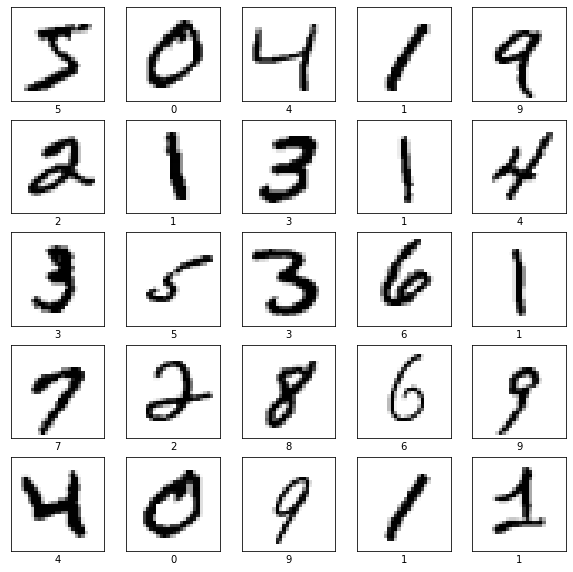

In [42]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

#### Performing One Hot Encoding

In [44]:
from keras.utils import to_categorical
y_train,y_test = to_categorical(y_train), to_categorical(y_test)
y_train[:10]

Using TensorFlow backend.


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
y_train.shape

(60000, 10)

#### Fashion MNIST Dataset

In [46]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [47]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [48]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

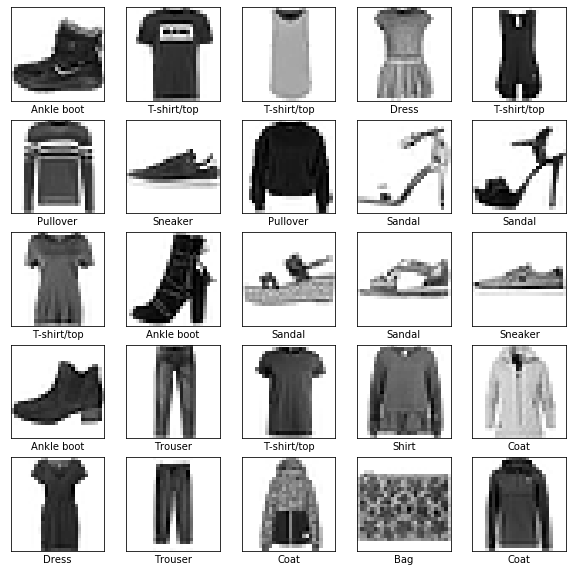

In [49]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

#### CIFAR Dataset

In [50]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170500096/170498071 [==============================] - 31s 0us/step


In [51]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [52]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

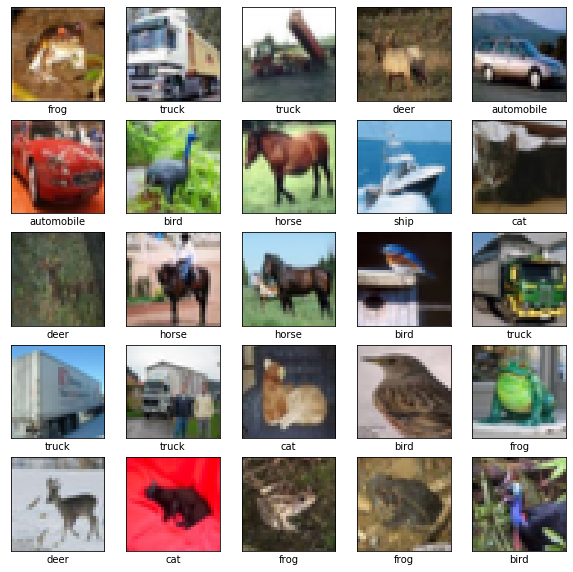

In [53]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

#### IMDB Dataset¶

In [54]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 20000
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


### 4. Neural Networks for Regression

#### Data Prep

In [55]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"                     
dataset = pd.read_csv(dataset_path)
dataset

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [56]:
dataset = dataset.dropna()

In [57]:
x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)

In [58]:
y_train = x_train.pop('medv')
y_test = x_test.pop('medv')

In [59]:
x_train = (x_train - x_train.mean())/(x_train.max()-x_train.min())
x_test = (x_test - x_test.mean())/(x_test.max()-x_test.min())

#### Model Building

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [63]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=[len(x_train.keys())]))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))
optimizer = tf.keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [64]:
model = Sequential([
    Dense(64,activation='relu',input_shape=[len(x_train.keys())]),
    Dense(64,activation='relu'),
    Dense(1,activation='linear')
])
optimizer = tf.keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


#### Model Training, Evaluation & Prediction

In [76]:
EPOCHS = 100
history = model.fit(x_train, y_train,epochs=EPOCHS,shuffle=True, validation_data=(x_test,y_test))

Train on 354 samples, validate on 152 samples
Epoch 1/100
354/354 [==============================] - 0s 1ms/sample - loss: 564.1817 - mae: 22.0421 - mse: 564.1818 - val_loss: 592.5391 - val_mae: 22.2164 - val_mse: 592.5391
Epoch 2/100
354/354 [==============================] - 0s 72us/sample - loss: 533.5790 - mae: 21.3247 - mse: 533.5789 - val_loss: 555.3987 - val_mae: 21.3721 - val_mse: 555.3987
Epoch 3/100
354/354 [==============================] - 0s 76us/sample - loss: 494.7631 - mae: 20.4110 - mse: 494.7630 - val_loss: 505.6749 - val_mae: 20.2022 - val_mse: 505.6749
Epoch 4/100
354/354 [==============================] - 0s 73us/sample - loss: 445.1767 - mae: 19.1672 - mse: 445.1767 - val_loss: 443.9127 - val_mae: 18.6950 - val_mse: 443.9127
Epoch 5/100
354/354 [==============================] - 0s 70us/sample - loss: 386.1333 - mae: 17.6021 - mse: 386.1333 - val_loss: 376.0914 - val_mae: 16.9146 - val_mse: 376.0914
Epoch 6/100
354/354 [==============================] - 0s 60us/sa

Epoch 48/100
354/354 [==============================] - 0s 65us/sample - loss: 15.9168 - mae: 2.7166 - mse: 15.9168 - val_loss: 20.0617 - val_mae: 3.1358 - val_mse: 20.0617
Epoch 49/100
354/354 [==============================] - 0s 62us/sample - loss: 15.7140 - mae: 2.7707 - mse: 15.7140 - val_loss: 17.9985 - val_mae: 2.8509 - val_mse: 17.9985
Epoch 50/100
354/354 [==============================] - 0s 57us/sample - loss: 15.6306 - mae: 2.7276 - mse: 15.6306 - val_loss: 19.8533 - val_mae: 3.1238 - val_mse: 19.8533
Epoch 51/100
354/354 [==============================] - 0s 58us/sample - loss: 15.6097 - mae: 2.7590 - mse: 15.6097 - val_loss: 18.4923 - val_mae: 2.9290 - val_mse: 18.4923
Epoch 52/100
354/354 [==============================] - 0s 56us/sample - loss: 15.2626 - mae: 2.6952 - mse: 15.2626 - val_loss: 17.8177 - val_mae: 2.8932 - val_mse: 17.8177
Epoch 53/100
354/354 [==============================] - 0s 55us/sample - loss: 15.1950 - mae: 2.7029 - mse: 15.1950 - val_loss: 17.9142

354/354 [==============================] - 0s 54us/sample - loss: 11.6600 - mae: 2.3522 - mse: 11.6600 - val_loss: 13.8430 - val_mae: 2.4774 - val_mse: 13.8430
Epoch 96/100
354/354 [==============================] - 0s 55us/sample - loss: 11.4638 - mae: 2.2916 - mse: 11.4638 - val_loss: 13.4264 - val_mae: 2.4881 - val_mse: 13.4264
Epoch 97/100
354/354 [==============================] - 0s 57us/sample - loss: 11.3864 - mae: 2.3024 - mse: 11.3864 - val_loss: 13.9939 - val_mae: 2.6417 - val_mse: 13.9939
Epoch 98/100
354/354 [==============================] - 0s 53us/sample - loss: 11.3741 - mae: 2.3433 - mse: 11.3741 - val_loss: 13.1651 - val_mae: 2.4517 - val_mse: 13.1651
Epoch 99/100
354/354 [==============================] - 0s 62us/sample - loss: 11.4296 - mae: 2.2833 - mse: 11.4296 - val_loss: 14.1411 - val_mae: 2.6455 - val_mse: 14.1411
Epoch 100/100
354/354 [==============================] - 0s 59us/sample - loss: 11.3099 - mae: 2.3361 - mse: 11.3099 - val_loss: 13.7998 - val_mae: 

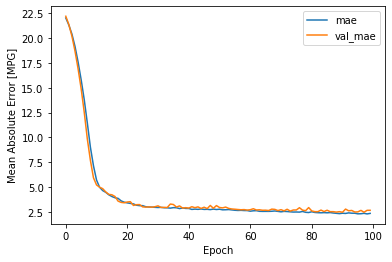

In [77]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epoch = range(len(mae))

import matplotlib.pyplot as plt

plt.plot(epoch,mae,label='mae')
plt.plot(epoch,val_mae,label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error [MPG]')
plt.legend()
plt.show()

In [78]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
print("Testing Mean Abs Error: {:5.2f}".format(mae))

152/152 - 0s - loss: 13.7998 - mae: 2.6478 - mse: 13.7998
Testing Mean Abs Error:  2.65


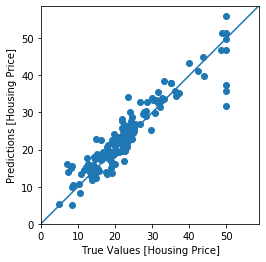

In [79]:
y_hat = model.predict(x_test).flatten()

plt.scatter(y_test, y_hat)
plt.xlabel('True Values [Housing Price]')
plt.ylabel('Predictions [Housing Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([0, 100], [0, 100])


In [80]:
model.save("regression.h5")

#### Model Loading

In [81]:
new_model = keras.models.load_model('regression.h5')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.save("regression/1/")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: regression/1/assets


In [83]:
new_model = keras.models.load_model('regression/1/')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


#### Save and Load Weights

In [85]:
# Save the weights
model.save_weights('./regression/1/w')

# Restore the weights
model.load_weights('./regression/1/w')

### 4. Neural Networks for Classification

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2910 - accuracy: 0.9148 - val_loss: 0.1569 - val_accuracy: 0.9537
Epoch 2/10
60000/60000 [=========================

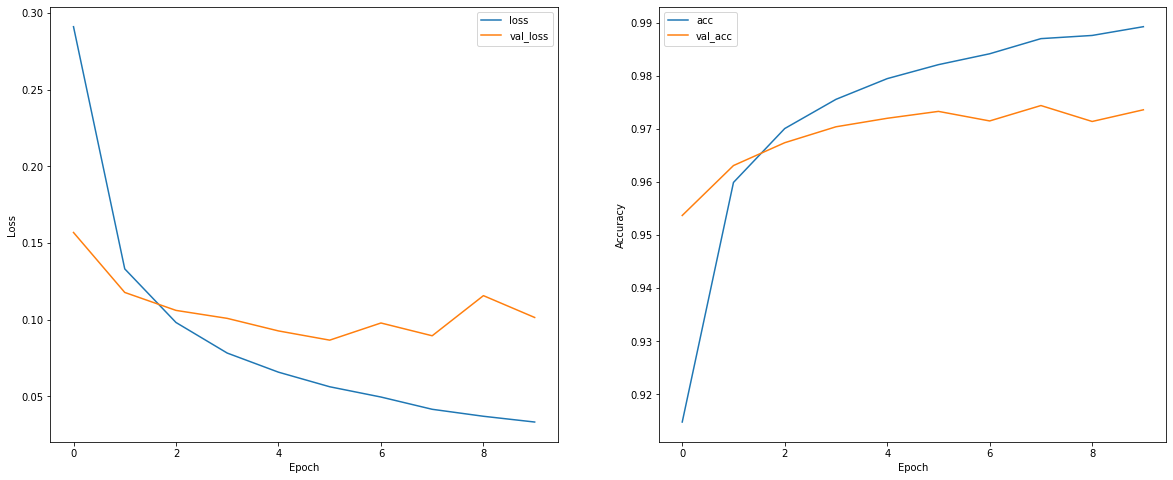

10000/10000 - 0s - loss: 0.1015 - accuracy: 0.9736
Accuracy: 97.36%
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [86]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0313 - accuracy: 0.9897 - val_loss: 0.1003 - val_accuracy: 0.9740
Epoch 2/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.1026 - val_accuracy: 0.9749
Epoch 3/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0251 - accuracy: 0.9917 - val_loss: 0.1218 - val_accuracy: 0.9721
Epoch 4/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.1152 - val_accuracy: 0.9722
Epoch 5/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.1205 - val_accuracy: 0.9738
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.1227 - val_accuracy: 0.9746
Epoch 7/10
60000/60000 [==============================] 

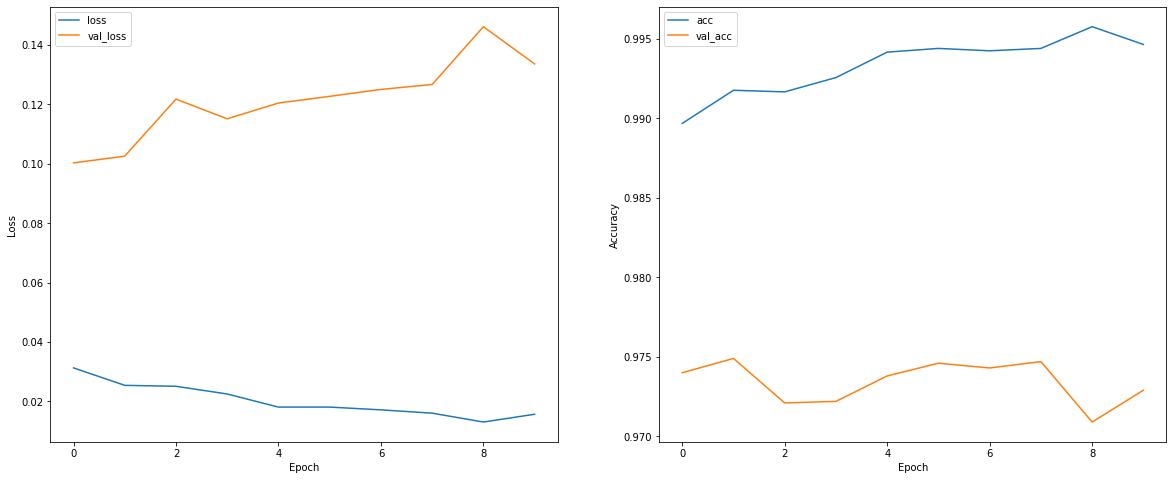

In [87]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [88]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

model.save("mnist.h5")

10000/10000 - 0s - loss: 0.1336 - accuracy: 0.9729
Accuracy: 97.29%


In [89]:
new_model =keras.models.load_model('mnist.h5')

new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
